___
# MINIPROJETO 2 - Teorema do Limite Central (TLC)

## <font color='red'>Guilherme de Moraes Schoueri</font>
___

## <font color='blue'>ESTUDO DA DISTRIBUIÇÃO DA MÉDIA AMOSTRAL ( ̅𝐗) VIA SIMULAÇÃO </font>

___
### Item 1:

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import stats


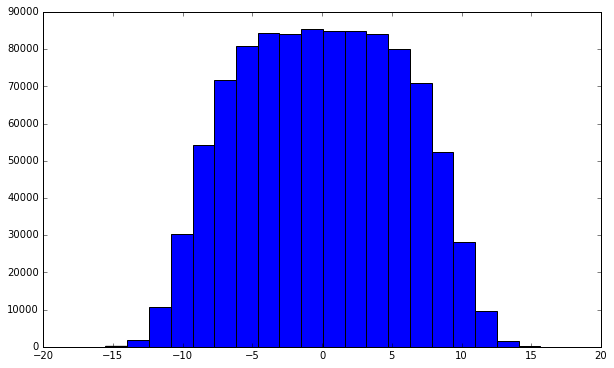

In [7]:
p = stats.gennorm.rvs(beta=5, loc=0, scale=10, size=1000000)

plt.figure(figsize=(10,6))
plt.hist(p, bins=20)
plt.show()

In [8]:
print("Media: " + str(sum(p)/len(p)))
print("Variância: " + str((sum(p**2)/len(p)) - (sum(p)/len(p))))

Media: 0.00119856689847
Variância: 32.4078767793


___
### Item 2:

In [9]:
n = 2

choice2 = np.random.choice(p, n)

med2 = sum(choice2)/len(choice2)

print("Valores sorteados: " + str(choice2))
print("Média dos valores sorteados: " + str(med2))

Valores sorteados: [ 2.00457081  4.21687221]
Média dos valores sorteados: 3.11072151166


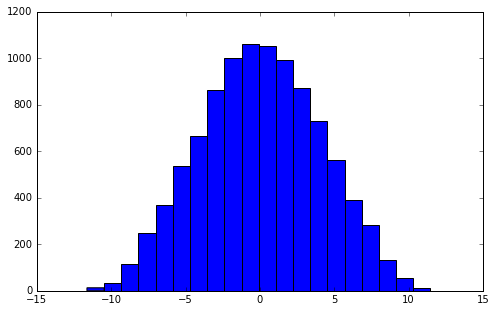

In [10]:
n = 2
medias = []

for i in range(10000):
    sorteado = np.random.choice(p, n)
    medias.append(sum(sorteado)/len(sorteado))

plt.figure(figsize=(8,5))
plt.hist(medias, bins=20)
plt.show()

In [11]:
mediasQuadrado = 0

for i in medias:
    mediasQuadrado += i**2

print("Media: " + str(sum(medias)/len(medias)))
print("Variância: " + str(mediasQuadrado/len(medias) - sum(medias)/len(medias)))


Media: 0.0281839698074
Variância: 16.2944724873


___
### Item 3:

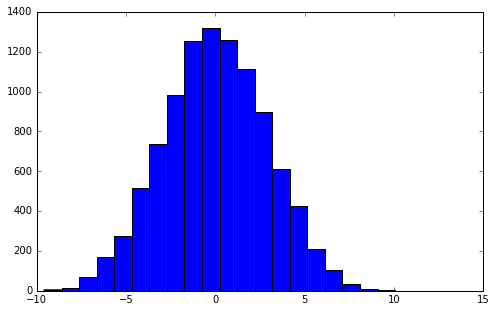

Para n = 4: 

Media: 0.00308567696788
Variância: 8.35847681879
___________________________________________________________________________________________




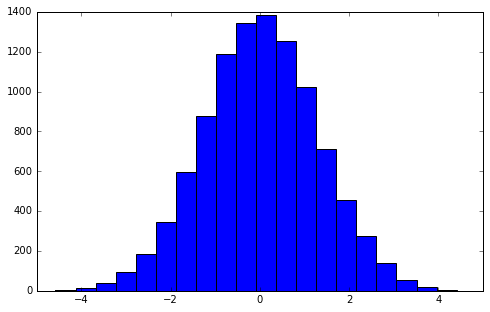

Para n = 20: 

Media: 0.0221584099969
Variância: 1.60408863889
___________________________________________________________________________________________




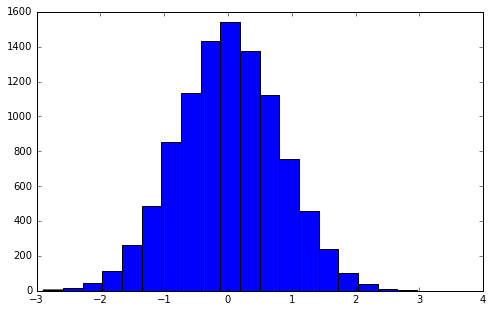

Para n = 50: 

Media: 0.0084717211997
Variância: 0.632692285826
___________________________________________________________________________________________




In [29]:
n = [4, 20, 50]

medias2 = [[], [], []]

for i in range(3):
    for j in range(10000):
        sorteado = np.random.choice(p, n[i])
        medias2[i].append(sum(sorteado)/len(sorteado))

    plt.figure(figsize=(8,5))
    plt.hist(medias2[i], bins=20)
    plt.show()
    
    medias2Quadrado = 0

    for k in medias2[i]:
        medias2Quadrado += k**2
    
    print("Para n = " + str(n[i]) + ": \n")
    print("Media: " + str(sum(medias2[i])/len(medias2[i])))
    print("Variância: " + str(medias2Quadrado/len(medias2[i]) - sum(medias2[i])/len(medias2[i])))
    print("___________________________________________________________________________________________\n\n")

In [30]:


for i in range(3):
    medias2Quadrado = 0
    
    for k in medias2[i]:
        medias2Quadrado += k**2
    
    print("\n\nPara n = " + str(n[i]) + ": \n")
    print("Media esperada: " + str(sum(p)/len(p)))
    print("Media encontrada: " + str(sum(medias2[i])/len(medias2[i])))
    print("\nVariância esperada: " + str(((sum(p**2)/len(p)) - (sum(p)/len(p)))/n[i]))
    print("Variância encontrada: " + str(medias2Quadrado/len(medias2[i]) - sum(medias2[i])/len(medias2[i])))



Para n = 4: 

Media esperada: 0.00119856689847
Media encontrada: 0.00308567696788

Variância esperada: 8.10196919481
Variância encontrada: 8.35847681879


Para n = 20: 

Media esperada: 0.00119856689847
Media encontrada: 0.0221584099969

Variância esperada: 1.62039383896
Variância encontrada: 1.60408863889


Para n = 50: 

Media esperada: 0.00119856689847
Media encontrada: 0.0084717211997

Variância esperada: 0.648157535585
Variância encontrada: 0.632692285826


___
### Item 4:

O Teorema do Limite Central (TLC) explica que para uma amostra aleatória retirada de uma população cuja variável de interesse X tem média μ e variância σ^2, então a distribuição de da média amostral ( ̅X) se aproxima de uma distribuição normal com média μ e variância σ^2/n, quando n tende ao infinito (suficientemente grande).

Neste Mini Projeto foi gerada uma população qualquer no item 1, na qual será analisada. No item 2 foi demonstrado como se pode criar uma amostra aleatória, sorteando n dados por amostra e calculando sua média. Em seguida, analisamos a distribuição das amostras calculando a média e a variância e as comparando com as da população do item 1. 

Podemos notar que, como dito anteriormente, a média das amostras se aproxima da média da população (μ), e a variância das amostras se aproxima ao resultado de σ^2/n, sendo σ^2 a variância da população. Porém, se quisermos melhorar a precisão da média encontrada, precisamos aumentar o n, porque quanto maior o n, a média encontrada será mais próxima de μ.
O item 3 visa analisar como o aumento do n interfere nos resultados. E, como esperado, a média foi se aproximando de μ e a variância foi se aproximando de 0 (por conta do resultado de σ^2/n).

___

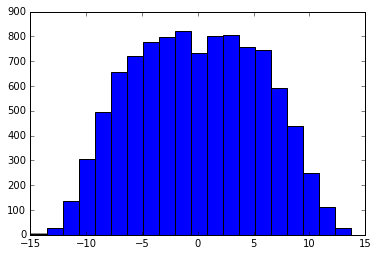

In [32]:
x1 = []
x9 = []

for i in range(10000):
    escolhas = np.random.choice(p, 50)
    x1.append(escolhas[0])
    x9.append(escolhas[8])

plt.hist(x1, bins=20)
plt.show()

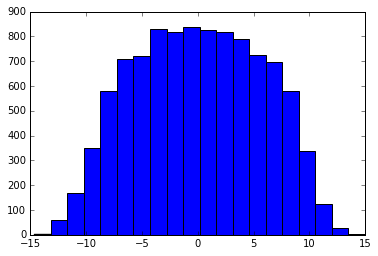

In [33]:
plt.hist(x9, bins=20)
plt.show()

In [43]:
mx1 = np.mean(x1)
mx9 = np.mean(x9)

print("Média X1: " + str(mx1))
print("Média X9: " + str(mx9))
print("Média item 1: " + str(np.mean(p)))
print("\nX1 e X9 não são identicamente distribuídas a X.")

Média X1: -0.0530361836159
Média X9: 0.046378038676
Média item 1: 0.00119856689847

X1 e X9 não são identicamente distribuídas a X.


In [39]:
cor = np.corrcoef(x1, x9)

print("Correlação entre X1 e X9: " + str(cor[1][0]))

Correlação entre X1 e X9: 0.00606074299596
